In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
from sklearn import datasets
from keras.applications.vgg16 import VGG16


import os, sys
import cv2



from PIL import Image 
from tqdm import tqdm_notebook 
from random import shuffle 
import shutil 
import pandas as pd 

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

import os
from PIL import Image
from keras.models import load_model
from ipywidgets import interact

# open the finder
path = "/Users/wuyouxin/Documents/Python/Python_Junior/資料庫/train/"
dirs = os.listdir(path)# 打開路徑



# print all files
for file in dirs:
    print(file)

# 不同種讀入方法
for f in dirs:
    dirs2 = os.path.join(path, f) # 會loop但只會儲存最後一個路徑
dirs3 = [os.path.join(path, f) for f in dirs] 
# 此法會把路徑儲存成為一條字串;join的語法是為了接上路徑
dirs3

path = "/Users/wuyouxin/Desktop/try"

os.makedirs(path, 755)

print("路徑被創建")

def organize_datasets(path_to_data, n=4000, ratio=0.2): 
    files = os.listdir(path_to_data) 
    files = [os.path.join(path_to_data, f)  for f  in files] 
    shuffle(files) 
    files = files[:n] 

    n = int(len(files) * ratio) 
    val, train = files[:n], files[n:] 

    for c  in ['dogs', 'cats']: 
        os.makedirs('./data/train/{0}/'.format(c)) 
        os.makedirs('./data/validation/{0}/'.format(c)) 

    print('folders created !') 

    for t  in tqdm_notebook(train): 
        if 'cat' in t: 
            shutil.copy2(t, os.path.join('.', 'data', 'train', 'cats')) 
        else: 
            shutil.copy2(t, os.path.join('.', 'data', 'train', 'dogs')) 

    for v  in tqdm_notebook(val): 
        if 'cat' in v: 
            shutil.copy2(v, os.path.join('.', 'data', 'validation', 'cats')) 
        else: 
            shutil.copy2(v, os.path.join('.', 'data', 'validation', 'dogs')) 
        print('Data copied!') 

shutil.rmtree('./data/') 
print('/data/ removed') 

I = cv2.imread("/Users/wuyouxin/Documents/Python/Python_Junior/資料庫/train/ben_afflek/httpcsvkmeuaeccjpg.jpg")
I
#利用opencv-python接口
#cv2.imread()读出来同样是array形式，但是如果是单通道的图，读出来的是三通道的

I = Image.open("/Users/wuyouxin/Documents/Python/Python_Junior/資料庫/train/ben_afflek/httpcsvkmeuaeccjpg.jpg")
I_array = np.array(I)
I_array.shape
#方法一：利用PIL中的Image函数，这个函数读取出来不是array格式
#这时候需要用 np.asarray(im) 或者np.array（）函数


I_gray = cv2.cvtColor(I_array, cv2.COLOR_BGR2GRAY)# cv2的灰階轉換

# 分三通道
def get_red(img):
    redImg = img[:, :, 2]
    return redImg
def get_green(img):
    greenImg = img[:, :, 1]
    return greenImg
def get_blue(img):
    blueImg = img[:, :, 0]
    return blueImg
#灰階轉換
def get_gray(img):
    grayImg = 0.2989*img[:, :, 0] + 0.5870*img[:, :, 1] + 0.1140*img[:, :, 2]
    return grayImg

def ResizeAndConToNumpyArray(pic,X_size,Y_size):
    gray = pic.convert('L')
    gray_rz = gray.resize((X_size,Y_size), Image.ANTIALIAS)
    np_gray= np.array(gray_rz,float)
    np_gray = np_gray.ravel()
    np_gray /= 255
    return np_gray

def load_data(data_path):
    img = Image.open(data_path)
    img_array = np.array(img)
    #歸一化
    img_array -= img_array.min()
    img_array /= img_array.max()
    
    

# 改檔名神器

## 不要重複執行，會覆蓋檔案
```
label_name = os.listdir("/Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/train")[:]

for j in label_name:
    if (j != ".DS_Store"):
        path = "/Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/test/"+j+"/"
        files = os.listdir(path)
        n = 0
        for i in files:
            if (i != ".DS_Store"):
                old = path+i
                new = path+j+"_"+str(n)+".jpg"
                os.rename(old, new)
                n = n+1
```

# 製作照片路徑

In [46]:
def load_photo(path):
    x = []
    for i in os.listdir(path):
        if (i != ".DS_Store"):
            for j in os.listdir(os.path.join(path, i)):
                if (j != ".DS_Store"):
                    x.append(os.path.join(path, i, j))
    x1 = []
    for ii in x:
        x1.append(np.array(Image.open(ii)))
    x1 = np.array(x1)
    return x1

# 整理照片為同維度

In [47]:
#調整照片
#path = /Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/test
def resize_all(path, x_size, y_size):
    for i in os.listdir(path):
        if (i != ".DS_Store"):
            for j in os.listdir(os.path.join(path, i)):
                if (j != ".DS_store"):
                    newpath = os.path.join(path, i, j)
                    fig = cv2.imread(newpath)
                    # troble shoot gif problem
                    try:
                        refig = cv2.resize(fig, (x_size, y_size))
                        cv2.imwrite(newpath, refig)
                    except:
                        os.remove(newpath)

# 資料處理區

In [49]:
#去除mac會產生的DS檔
def remove_ds_store(path):
    for i in listdir(path):
        if (i == ".DS_store"):
            os.remove(os.path.join(path, i))

In [50]:
#讀取label資料
def load_dataset(path):
    data = load_files(path)
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return targets,target_labels

In [51]:
#讀取照片矩陣
def load_photo(path):
    x = []
    for i in os.listdir(path):
        if (i != ".DS_Store"):
            for j in os.listdir(os.path.join(path, i)):
                if (j != ".DS_Store"):
                    x.append(os.path.join(path, i, j))
    x1 = []
    for ii in x:
        x1.append(np.array(Image.open(ii)))
    x1 = np.array(x1)
    return x1

In [52]:
y_train, train_label = load_dataset("/Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/train")
y_test, test_label = load_dataset("/Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/test")

In [53]:
x_train = load_photo("/Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/train/")
x_test = load_photo("/Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/test/")

In [54]:
print(x_train.shape)
print(x_test.shape)

(6360, 100, 100, 3)
(1521, 100, 100, 3)


In [55]:
x_train=x_train/255
x_test=x_test/255

In [56]:
print(x_train.max())
print(x_test.min())

1.0
0.0


In [57]:
y_train=np_utils.to_categorical(y_train, 12)
y_test=np_utils.to_categorical(y_test, 12)

In [58]:
print(y_train.shape)
print(y_test.shape)

(6360, 12)
(1521, 12)


# 畫圖及存檔的函數

In [266]:
#對epoch次數作圖
def graphic(f, epoch_num):
    
    plt.subplot(2, 1, 1)
    plt.plot(f.history["acc"], linewidth = 2, color = "r", linestyle = "--")
    plt.xlabel("epochs")
    plt.ylabel("acc")
    plt.xticks(np.arange(0, epoch_num, 1))
    plt.title("model")


    plt.subplot(2, 1, 2)
    plt.plot(f.history["loss"], linewidth = 2, color = "g", linestyle = ":")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.xticks(np.arange(0, epoch_num, 1))
    plt.tight_layout() #防止重疊

In [307]:
# 對存好的txt作圖
def graphic_txt(acc_path, loss_path):
    f = open(acc_path, "r")
    f1 = f.readlines()
    f2 = []
    for i in f1:
        f2.append(round(float(i.split("\n")[0]),5))
   
    g = open(loss_path, "r")
    g1 = g.readlines()
    g2 = []
    for j in g1:
        g2.append(round(float(j.split("\n")[0]),5))
    
    
    
    plt.subplot(2, 1, 1)
    plt.plot(f2, linewidth = 2, color = "r", linestyle = "--")
    plt.xlabel("epochs")
    plt.ylabel("acc")
    plt.xticks(np.arange(0, len(f1), 1))

    plt.subplot(2, 1, 2)
    plt.plot(g2, linewidth = 2, color = "g", linestyle = ":")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.xticks(np.arange(0, len(f1), 1))
    plt.tight_layout() #防止重疊

In [255]:
def save(path, model_num):
    models = [model1, model2, model3, model4]
    fittings = [fitting1, fitting2, fitting3, fitting4]
    # save weight
    models[model_num-1].save(os.path.join(path, "final_model"+str(model_num)+".h5"))
    # save training process
    np.savetxt(os.path.join(path, "final_model"+str(model_num)+"_acc.txt"), np.array(fittings[model_num-1].history["acc"]))
    np.savetxt(os.path.join(path, "final_model"+str(model_num)+"_loss.txt"), np.array(fittings[model_num-1].history["loss"]))

# 模型區 
### Model 1

In [60]:
model1= Sequential()

model1.add(Convolution2D(3,(5,5), padding="same", input_shape=(100,100,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Convolution2D(6,(5,5), padding="same", input_shape=(100,100,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Convolution2D(9,(5,5), padding="same", input_shape=(100,100,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Convolution2D(12,(5,5), padding="same", input_shape=(100,100,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(12))
model1.add(Activation("softmax"))



In [61]:
model1.compile(loss="mse",
              optimizer=SGD(lr=0.05),
              metrics=["accuracy"])

In [62]:
fitting1 = model1.fit(x_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
6360/6360 [==============================] - 60s 9ms/step - loss: 0.0765 - acc: 0.0881
Epoch 2/10
6360/6360 [==============================] - 58s 9ms/step - loss: 0.0764 - acc: 0.0841
Epoch 3/10
6360/6360 [==============================] - 58s 9ms/step - loss: 0.0764 - acc: 0.0860
Epoch 4/10
6360/6360 [==============================] - 58s 9ms/step - loss: 0.0764 - acc: 0.0879
Epoch 5/10
6360/6360 [==============================] - 58s 9ms/step - loss: 0.0764 - acc: 0.0876
Epoch 6/10
6360/6360 [==============================] - 58s 9ms/step - loss: 0.0764 - acc: 0.0874
Epoch 7/10
6360/6360 [==============================] - 58s 9ms/step - loss: 0.0764 - acc: 0.0846
Epoch 8/10
6360/6360 [==============================] - 58s 9ms/step - loss: 0.0764 - acc: 0.0846
Epoch 9/10
6360/6360 [==============================] - 59s 9ms/step - loss: 0.0764 - acc: 0.0882
Epoch 10/10
6360/6360 [==============================] - 58s 9ms/step - loss: 0.0764 - acc: 0.0885


In [63]:
score1=model1.evaluate(x_test,y_test)

1521/1521 [==============================] - 7s 5ms/step


In [64]:
print('loss: ',score1[0])
print('accuracy: ',score1[1])

loss:  0.07641772024044467
accuracy:  0.08021038790514483


In [256]:
save("/Users/wuyouxin/Documents/Python/Python_Junior/weight",1)

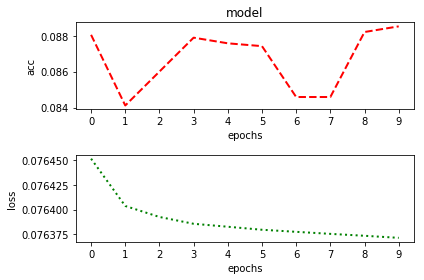

In [267]:
graphic(fitting1,10)

### Model 2

In [67]:
model2 = Sequential()
model2.add(ZeroPadding2D((1,1),input_shape=(100, 100, 3)))
model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2,2), strides=(2,2)))

model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(128, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(128, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2,2), strides=(2,2)))

model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(256, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(256, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(256, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2,2), strides=(2,2)))

model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2,2), strides=(2,2)))

model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(512, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2,2), strides=(2,2)))

model2.add(Flatten())
model2.add(Dense(20, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(20, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(12, activation='softmax'))

/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv

In [68]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=sgd, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [69]:
fitting2 = model2.fit(x_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
6360/6360 [==============================] - 1565s 246ms/step - loss: 2.5080 - acc: 0.0802
Epoch 2/10
6360/6360 [==============================] - 1462s 230ms/step - loss: 2.5075 - acc: 0.0836
Epoch 3/10
6360/6360 [==============================] - 1462s 230ms/step - loss: 2.5057 - acc: 0.0838
Epoch 4/10
6360/6360 [==============================] - 1460s 230ms/step - loss: 2.5072 - acc: 0.0835
Epoch 5/10
6360/6360 [==============================] - 1461s 230ms/step - loss: 2.5060 - acc: 0.0849
Epoch 6/10
6360/6360 [==============================] - 1460s 230ms/step - loss: 2.5081 - acc: 0.0857
Epoch 7/10
6360/6360 [==============================] - 1460s 230ms/step - loss: 2.5065 - acc: 0.0800
Epoch 8/10
6360/6360 [==============================] - 1460s 230ms/step - loss: 2.5078 - acc: 0.0835
Epoch 9/10
6360/6360 [==============================] - 1459s 229ms/step - loss: 2.5063 - acc: 0.0814
Epoch 10/10
6360/6360 [==============================] - 1459s 229ms/step - loss: 

In [70]:
score2=model2.evaluate(x_test,y_test)

1521/1521 [==============================] - 167s 110ms/step


In [71]:
print('loss: ',score2[0])
print('accuracy: ',score2[1])

loss:  2.4966397330919277
accuracy:  0.08744247206765363


In [257]:
save("/Users/wuyouxin/Documents/Python/Python_Junior/weight",2)

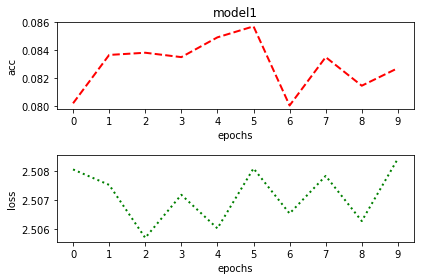

In [73]:
graphic(fitting2,10)

### Model 3

In [74]:
model3 = Sequential()

model3.add(Convolution2D(10,(5,5), padding='same',input_shape =(100, 100, 3)))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Convolution2D(20,(5,5),padding='same'))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))


model3.add(Convolution2D(20,(5,5),padding='same'))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Convolution2D(30,(5,5),padding='same'))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))


model3.add(Flatten())
model3.add(Dense(30))
model3.add(Activation("sigmoid"))
model3.add(Dense(12))
model3.add(Dropout(0.25))
model3.add(Activation('softmax'))

In [75]:
model3.compile(loss="categorical_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

In [76]:
fitting3 = model3.fit(x_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
6360/6360 [==============================] - 110s 17ms/step - loss: 2.5005 - acc: 0.0763
Epoch 2/10
6360/6360 [==============================] - 109s 17ms/step - loss: 2.4898 - acc: 0.0877
Epoch 3/10
6360/6360 [==============================] - 109s 17ms/step - loss: 2.4901 - acc: 0.0862
Epoch 4/10
6360/6360 [==============================] - 109s 17ms/step - loss: 2.4905 - acc: 0.0811
Epoch 5/10
6360/6360 [==============================] - 109s 17ms/step - loss: 2.4900 - acc: 0.0763
Epoch 6/10
6360/6360 [==============================] - 109s 17ms/step - loss: 2.4901 - acc: 0.0874
Epoch 7/10
6360/6360 [==============================] - 109s 17ms/step - loss: 2.4903 - acc: 0.0838
Epoch 8/10
6360/6360 [==============================] - 109s 17ms/step - loss: 2.4895 - acc: 0.0877
Epoch 9/10
6360/6360 [==============================] - 109s 17ms/step - loss: 2.4875 - acc: 0.0855
Epoch 10/10
6360/6360 [==============================] - 109s 17ms/step - loss: 2.4862 - acc: 0.0898

In [77]:
score3=model3.evaluate(x_test,y_test)

1521/1521 [==============================] - 12s 8ms/step


In [78]:
print('loss: ',score3[0])
print('accuracy: ',score3[1])

loss:  2.4853495469930373
accuracy:  0.08941485865542483


In [258]:
save("/Users/wuyouxin/Documents/Python/Python_Junior/weight",3)

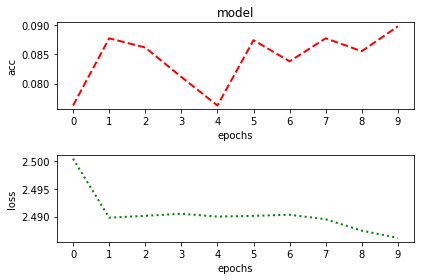

In [268]:
graphic(fitting3,10)

### Model 4

In [81]:
model4 = Sequential()
model4.add(ZeroPadding2D((1,1),input_shape=(100, 100, 3)))
model4.add(Convolution2D(64, 3, 3, activation='relu'))
model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(64, 3, 3, activation='relu'))
model4.add(MaxPooling2D((2,2), strides=(2,2)))
model4.add(Dropout(0.5))

model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(128, 3, 3, activation='relu'))
model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(128, 3, 3, activation='relu'))
model4.add(MaxPooling2D((2,2), strides=(2,2)))
model4.add(Dropout(0.5))

model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(256, 3, 3, activation='relu'))
model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(256, 3, 3, activation='relu'))
model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(256, 3, 3, activation='relu'))
model4.add(MaxPooling2D((2,2), strides=(2,2)))
model4.add(Dropout(0.5))

model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(512, 3, 3, activation='relu'))
model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(512, 3, 3, activation='relu'))
model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(512, 3, 3, activation='relu'))
model4.add(MaxPooling2D((2,2), strides=(2,2)))
model4.add(Dropout(0.5))

model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(512, 3, 3, activation='relu'))
model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(512, 3, 3, activation='relu'))
model4.add(ZeroPadding2D((1,1)))
model4.add(Convolution2D(512, 3, 3, activation='relu'))
model4.add(MaxPooling2D((2,2), strides=(2,2)))
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(20, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(20, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(12, activation='softmax'))

/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/Users/wuyouxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call

In [82]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(optimizer=sgd, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [83]:
fitting4 = model4.fit(x_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
6360/6360 [==============================] - 1522s 239ms/step - loss: 2.5069 - acc: 0.0825
Epoch 2/10
6360/6360 [==============================] - 1519s 239ms/step - loss: 2.5098 - acc: 0.0761
Epoch 3/10
6360/6360 [==============================] - 1518s 239ms/step - loss: 2.5100 - acc: 0.0838
Epoch 4/10
6360/6360 [==============================] - 1519s 239ms/step - loss: 2.5067 - acc: 0.0887
Epoch 5/10
6360/6360 [==============================] - 1520s 239ms/step - loss: 2.5087 - acc: 0.0767
Epoch 6/10
6360/6360 [==============================] - 1521s 239ms/step - loss: 2.5066 - acc: 0.0903
Epoch 7/10
6360/6360 [==============================] - 1524s 240ms/step - loss: 2.5093 - acc: 0.0752
Epoch 8/10
6360/6360 [==============================] - 1523s 240ms/step - loss: 2.5070 - acc: 0.0871
Epoch 9/10
6360/6360 [==============================] - 1525s 240ms/step - loss: 2.5066 - acc: 0.0764
Epoch 10/10
6360/6360 [==============================] - 1527s 240ms/step - loss: 

In [84]:
score4=model4.evaluate(x_test,y_test)

1521/1521 [==============================] - 168s 110ms/step


In [85]:
print('loss: ',score4[0])
print('accuracy: ',score4[1])

loss:  2.4963003393069134
accuracy:  0.08021038790759406


In [259]:
save("/Users/wuyouxin/Documents/Python/Python_Junior/weight",4)

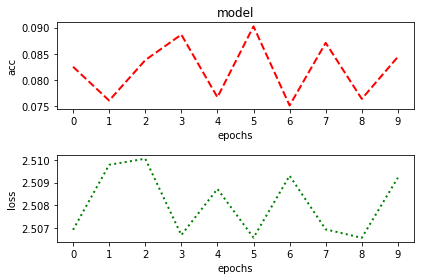

In [269]:
graphic(fitting4,10)

# 預測結果

In [191]:
#parameter is figure path 
def pridect(path,model_num):
    models = [model1, model2, model3, model4]
    fig = cv2.imread(path)
    refig = np.array([cv2.resize(fig, (100,100))]) #input has to be 100x100
    results = models[model_num-1].predict(refig)[0] #get value from 1x1 matrics
    
    max_val_index = np.where(results==results.max())[0][0] # find the index of max value
    
    cele_photo = os.path.join(os.path.join(os.path.dirname(os.path.dirname(path)), "train", test_label[max_val_index]), os.listdir(os.path.join(os.path.dirname(os.path.dirname(path)), "train", test_label[max_val_index]))[0])
    plt.subplot(1,2,1)
    plt.imshow(Image.open(cele_photo))
    plt.title("output")
    
    
    
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cv2.resize(cv2.imread(path), (100,100)), cv2.COLOR_BGR2RGB))
    plt.title("input")
    plt.tight_layout() #防止重疊
    
    print("跟你最像的明星是：",test_label[max_val_index])
    print(results[max_val_index])
    print(" ")
    
#    for i in np.arange(len(results)): # 列印所有機率
#        print(test_label[i])
#        print(results[i])
#        print(" ")

In [192]:
interact(pridect,
        path = "./data/celebritys/predict/IMG_5010.JPG",
        model_num = [1,2,3,4])

interactive(children=(Text(value='./data/celebritys/predict/IMG_5010.JPG', description='path'), Dropdown(descr…

<function __main__.pridect(path, model_num)>